## Callin Switzer
10 Dec 2018
### Modified TLD script for running simulation
### Check how many steps I should use

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import math
import seaborn as sns
from scipy.integrate import odeint
import random
import time
from datetime import datetime
from matplotlib.patches import Ellipse
from collections import OrderedDict
import matplotlib.gridspec as gridspec
import sys
import importlib
print(sys.version)
now = datetime.now()
print("last run on " + str(now))

3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]
last run on 2019-03-05 10:43:14.152234


In [16]:
import multiProcTraj
import multiProcTraj as mpt

In [17]:
importlib.reload(multiProcTraj)
print(mpt.g, mpt.K, mpt.springExponent, mpt.nstep)

980.0 29.3 1 10


(2,)
elapsed time =  0.05485177040100098
(3,)
elapsed time =  0.0947723388671875
(10,)
elapsed time =  0.13266730308532715
(100,)
elapsed time =  0.1696014404296875


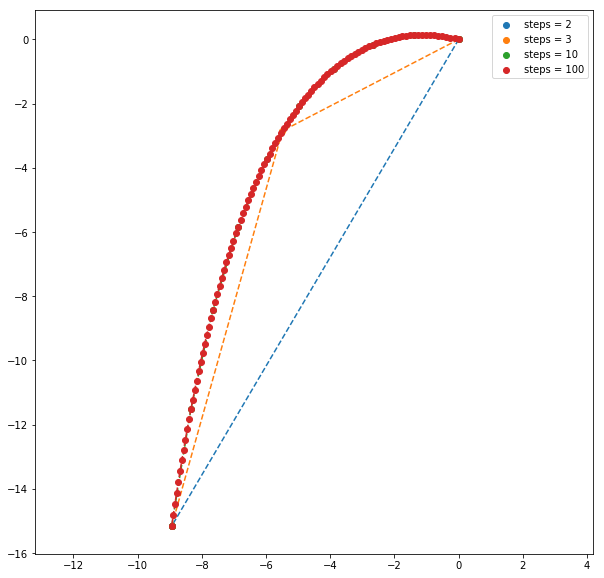

In [21]:
# specify ranges
# x,xd,y,yd,
# theta,thetad,phi,phid, 
# F, alpha, tau0

np.random.seed(seed=123)

ranges = np.array([[0, 0], [-1500, 1500], [0, 0], [-1500, 1500],   
                   [0, 2*np.pi], [-25, 25], [0, 2*np.pi], [-25, 25], 
                  [0, 44300], [0, 2*np.pi], [-100000, 100000]])


mpt.g = 100000.0
tic = time.time()


# test several numbers of steps


mpt.nrun = 1  #number of trajectories.
# generate random initial conditions for state 0
state0 = np.random.uniform(ranges[:, 0], ranges[:, 1], 
                           size=(mpt.nrun, ranges.shape[0]), )
xy = []
plt.figure(figsize = [10,10])  

plt.axes().set_aspect('equal', 'datalim')

for mpt.nstep in [2,3,10, 100]:
    
  
    
    
    # refref: do we want endpoint?
    mpt.t = np.linspace(0, 0.02, num = mpt.nstep, endpoint = True) # time cut into XXX timesteps
    print(mpt.t.shape)

    # initialize the matrix of 0's
    zeroMatrix = np.zeros([mpt.nrun, mpt.nstep])
    x,      xd,    y,   yd, \
    theta, thetad, phi, phid = [zeroMatrix.copy() for ii in 
                                    range(len([ "x",     "xd",     "y", "yd", 
                                                "theta", "thetad", "phi", "phid"]))]



    # loop through all the runs
    for i in range(0,mpt.nrun):
        # run ODE
        state = odeint(mpt.FlyTheBug, state0[i, :], mpt.t)
        x[i,:], xd[i,:] = state[:,0], state[:,1]
        y[i,:], yd[i, :] = state[:,2], state[:,3]
        theta[i,:], thetad[i, :] = state[:,4],state[:,5]
        phi[i,:], phid[i, :] = state[:, 6], state[:,7]
    
    print('elapsed time = ',time.time()-tic)
    
   

    for i in range(0,mpt.nrun):
        plt.plot(x[i, :],y[i, :], linestyle='--', marker='o')

    plt.scatter(x[:,-1:][:,0], y[:,-1:][:,0], label = "steps = " + str(mpt.nstep))
    #plt.show()
    xy.append([x[:,-1:][:,0], y[:,-1:][:,0]])

plt.legend()
plt.show()


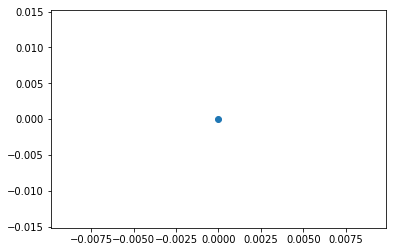

In [23]:
#plt.figure(figsize = [10,10])  
ii = 0
plt.scatter(np.array(xy)[ii,:,:][0] - np.array(xy)[ii+3,:,:][0], np.array(xy)[ii,:,:][1] - np.array(xy)[ii + 3,:,:][1])  

In [5]:
np.array(xy)[0,:][0] - np.array(xy)[3,:,:][0]

array([ 9.94759830e-14,  4.44266846e-12,  6.39488462e-14, -8.70414851e-14,
       -4.99156272e-13,  5.77826722e-07, -1.42108547e-14, -6.16956086e-09,
       -4.37871961e-13, -2.11386464e-13,  1.42108547e-13,  6.42952358e-11,
        2.90967250e-12, -8.75743922e-13, -1.14794574e-09, -1.17879040e-11,
        5.50670620e-13,  2.05488959e-11,  5.50670620e-13, -2.13162821e-14,
        4.76063633e-13,  9.63780167e-11, -5.32907052e-14, -2.48689958e-14,
       -1.06581410e-14,  3.62732067e-12, -8.52651283e-14,  2.27906582e-12,
       -3.41252360e-10,  1.24344979e-13, -9.48115186e-08, -8.29438740e-11,
        8.66862138e-13,  7.10542736e-14, -1.45661261e-12, -4.88498131e-14,
       -1.98951966e-13,  5.40012479e-13, -4.33431069e-13,  3.77315956e-11,
       -3.32947003e-11, -2.66453526e-14,  2.48689958e-14, -1.64845915e-12,
       -1.68665082e-12, -3.55271368e-15, -5.15143483e-14,  3.97903932e-13,
        2.73114864e-14,  5.32907052e-15,  3.26849658e-13, -5.75539616e-13,
       -1.78730275e-09,  

In [ ]:
plt.figure(figsize = [10,10])
plt.axes().set_aspect('equal', 'datalim')
for i in range(0,nrun):
    plt.plot(x[i, :],y[i, :], label = 'trajectory x vs y')
    
    
plt.scatter(x[:,-1:][:,0], y[:,-1:][:,0])

In [ ]:
dfa = pd.DataFrame(state0, columns=["x","xd","y","yd","theta","thetad","phi","phid", "F", "alpha", "tau0"])

In [ ]:
df_final = pd.DataFrame(OrderedDict({"xf" : x[:,-1:][:,0], 
              "xdf" : xd[:,-1:][:,0], 
              "yf": y[:,-1:][:,0],
              "ydf" : yd[:,-1:][:,0], 
              "thetaf" : theta[:,-1:][:,0],
              "thetadf" : thetad[:,-1:][:,0], 
              "phif" : phi[:,-1:][:,0], 
              "phidf" : phid[:,-1:][:,0], 
             } ))
df_final.head()

In [ ]:
df_c = pd.concat([dfa.reset_index(drop=True), df_final], axis=1)
df_c.head()

In [ ]:
dataOutput

In [ ]:
#df_c.to_csv(os.path.join(dataOutput, "UpdatedCodeCheck.csv"), index= False)

In [ ]:
# read in Jorge's comparison
checkData = pd.read_csv(os.path.join(dataOutput, "UpdatedCodeCheck_output_all.csv"), )

In [ ]:
checkData.head()

In [ ]:
nstep

In [ ]:
plt.figure(figsize = [10,10])
plt.axes().set_aspect('equal', 'datalim')

for i in range(0,nrun):
    plt.plot(x[i, :],y[i, :], alpha = 0.2)
    
plt.scatter(x[:, -1:], y[:, -1:], c= 'orange', label = "Python")
plt.scatter(checkData.x_a, checkData.y_a, label = "Matlab")
plt.legend()
plt.savefig(os.path.join(figDir, "PythonVsMatlab.png") )
plt.show()

In [ ]:
x.shape # nrun, nstep

In [ ]:
# plotnum of timesteps vs. xf (don't get too high or too low)
# check parameters
# check duration


In [ ]:
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(x[:, -1:].reshape(-1) - checkData.x_a, y[:, -1:].reshape(-1) - checkData.y_a, s = 15, alpha = 0.4, c= "black")
plt.title("Error from matlab vs. python")
plt.savefig(os.path.join(figDir, "PythonVsMatlab_error.png") )
plt.show()

## Visualize moth at different timesteps
* See if moth is spinning
* See if abdomen is rotating too far

In [ ]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    '''
    rho: radius
    phi: angle (in radians)
    '''
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

def midpoint(p1, p2):
    return ((p1[0]+p2[0])/2, (p1[1]+p2[1])/2)

In [ ]:
plt.figure(figsize = [10,10])
plt.axes().set_aspect('equal', 'datalim')
i =54
plt.plot(x[i, :],y[i, :], label = 'trajectory x vs y')

In [ ]:
# plot moth and force

timestep = 0
# theta = head angle
# phi = abdomen angle
thoraxLen = 0.908 * 2# cm
abLen = 1.747 *2 #cm
bodyWidth = 1.1


# plot trajectory
fig, ax = plt.subplots( figsize = [10,10])
ax.set_aspect('equal', 'datalim')
i += 1
ax.plot(x[i, :],y[i, :], label = 'trajectory x vs y')


# add body positions:
for timestep in (np.linspace(0, nstep - 1, num = 8 )).astype(int):
    center = np.array([x[i, timestep], y[i, timestep]])
    head = center + np.array(pol2cart(thoraxLen, theta[i, timestep]))
    abTip = center + np.array(pol2cart(abLen, phi[i, timestep]))
    
    
    
    xx, yy = zip(*[center, head])
    xab,yab = zip(*[center, abTip])

    el = Ellipse(midpoint(center, head), width = thoraxLen, height = bodyWidth, facecolor='#907760', alpha=0.8, angle = math.degrees(theta[i, timestep]))
    el2 = Ellipse(midpoint(center, abTip), width = abLen, height = bodyWidth, facecolor='#DEC9B0', alpha=0.8, angle = math.degrees(phi[i, timestep]))

    ax.add_artist(el)
    ax.add_artist(el2)

    ax.plot(xx, yy, 'k', alpha = 0.2)
    #ax.scatter(xx, yy, s= 10, c = 'k', alpha = 0.2)
    ax.plot(xab,yab, 'k', alpha = 0.2)
    #ax.scatter(xab,yab, s = 10, c = 'k', alpha = 0.2)
    
    # plot force 
    forceAlpha = state0[i, 9]
    forceCenter = midpoint(center, head)
    forceMagnitude = state0[i, 8] / 15000 # scale 
    #ax.scatter(forceCenter[0], forceCenter[1], s= 30, c= 'r', alpha = 1)
    forceAngle = theta[i, timestep] + forceAlpha
    forceTip = np.add(pol2cart(forceMagnitude, forceAngle), forceCenter)
    #ax.scatter(forceTip[0], forceTip[1], s= 30, c= 'r', alpha = 1)
    ax.arrow(x = forceCenter[0], y = forceCenter[1], 
             dx = forceTip[0] - forceCenter[0],  dy =  forceTip[1] - forceCenter[1], 
            head_width = 0.2, color = "#B61212")

In [ ]:
# plot moth with ellipses
# refref: what force would it take for the mother to counter-act gravity?

timestep = 0
# theta = head angle
# phi = abdomen angle
thoraxLen = 0.908 * 2# cm
abLen = 1.7475 *2 #cm
bodyWidth = 1.1


# plot trajectory
fig, ax = plt.subplots( figsize = [10,10])
ax.set_aspect('equal', 'datalim')

for i in np.random.randint(0, high = nrun, size = 3):
    # plot trajectory
    ax.plot(x[i, :],y[i, :], label = 'trajectory x vs y')

    # add body positions:
    for timestep in (np.linspace(0, nstep -1, num = 8 )).astype(int):
        center = np.array([x[i, timestep], y[i, timestep]])
        head = center + np.array(pol2cart(thoraxLen, theta[i, timestep]))
        abTip = center + np.array(pol2cart(abLen, phi[i, timestep]))



        xx, yy = zip(*[center, head])
        xab,yab = zip(*[center, abTip])

        el = Ellipse(midpoint(center, head), width = thoraxLen, height = bodyWidth, facecolor='#907760', alpha=0.8, angle = math.degrees(theta[i, timestep]))
        el2 = Ellipse(midpoint(center, abTip), width = abLen, height = bodyWidth, facecolor='#DEC9B0', alpha=0.8, angle = math.degrees(phi[i, timestep]))

        ax.add_artist(el)
        ax.add_artist(el2)

        ax.plot(xx, yy, 'k', alpha = 0.2)
        #ax.scatter(xx, yy, s= 10, c = 'k', alpha = 0.2)
        ax.plot(xab,yab, 'k', alpha = 0.2)
        #ax.scatter(xab,yab, s = 10, c = 'k', alpha = 0.2)

        # plot force 
        forceAlpha = state0[i, 9]
        forceCenter = midpoint(center, head)
        forceMagnitude = state0[i, 8] / 15000 # scale 
        #ax.scatter(forceCenter[0], forceCenter[1], s= 30, c= 'r', alpha = 1)
        forceAngle = theta[i, timestep] + forceAlpha
        forceTip = np.add(pol2cart(forceMagnitude, forceAngle), forceCenter)
        #ax.scatter(forceTip[0], forceTip[1], s= 30, c= 'r', alpha = 1)
        ax.arrow(x = forceCenter[0], y = forceCenter[1], 
                 dx = forceTip[0] - forceCenter[0],  dy =  forceTip[1] - forceCenter[1], 
                head_width = 0.2, color = "#B61212")
        
# from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
# scalebar = AnchoredSizeBar(ax.transData,
#                            980/1500, 'Force of gravity', 'lower right', 
#                            pad=0.1,
#                            color="#B61212",
#                            frameon=False,
#                            size_vertical=0.07, sep = 8)

# plt.gca().add_artist(scalebar)
# ax.add_artist(scalebar)

## Calculate Angle from torque

In [ ]:
# reset k to original
# 7 sec, tao = 100, g = 0
# drop back to linear -- see what happens with fixed toque
# do again with damping (set c to 0) set to 0 (should see resonance) -- we should know the resonance for a linear spring
# do c = 0 with no torque (can set nstep = 1000 / sec)
# plot beta (angle b/w thorax and abdomen) vs. time
# plot derivative of beta


# redo with nonlinear spring
# set body angle to 90 degrees, and see what happens. 
# redo with c == 0 

In [ ]:
# reload multiProcTrag
importlib.reload(multiProcTraj)
print(mpt.g, mpt.K, mpt.springExponent)

mpt.nstep

In [ ]:
np.random.seed(seed=12035)
#  x,xd,y,yd,
# theta,thetad,phi,phid, 
# F, alpha, tau0
# ranges = np.array([[0, 0], [0.0001, 0.0001], [0, 0], [0.0001, 0.0001],   
#                    [np.pi/2, np.pi/2], [0, 0], [3*np.pi/2, 3*np.pi/2], [0, 0], 
#                   [0, 0], [0, 0], [0, -100000]])



ranges = np.array([[0, 0], [0.0001, 0.0001], [0, 0], [0.0001, 0.0001],   
                   [np.pi/2, np.pi/2], [0, 0], [2*np.pi/2, 2*np.pi/2], [0, 0], 
                  [0, 0], [0, 0], [00, 00]])


tic = time.time()
simLength = 7.0 # seconds
samplesPerSec= 1000
mpt.nstep = int(simLength * samplesPerSec) # steps per second
mpt.t = np.linspace(0, simLength, num = mpt.nstep, endpoint = False) # time cut into 100 timesteps
mpt.c = 0

nrun = 1 #number of trajectories.

# initialize the matrix of 0's
zeroMatrix = np.zeros([nrun, len(mpt.t)])
x,      xd,    y,   yd, \
theta, thetad, phi, phid = [zeroMatrix.copy() for ii in 
                                range(len([ "x",     "xd",     "y", "yd", 
                                            "theta", "thetad", "phi", "phid"]))]
print(x.shape)

# generate random initial conditions for state 0
state0 = np.random.uniform(ranges[:, 0], ranges[:, 1], 
                           size=(nrun, ranges.shape[0]), )


# loop through all the runs
for i in range(0,nrun):
    # run ODE
    state = odeint(mpt.FlyTheBug, state0[i, :], mpt.t)
    x[i,:], xd[i,:] = state[:,0], state[:,1]
    y[i,:], yd[i, :] = state[:,2], state[:,3]
    theta[i,:], thetad[i, :] = state[:,4],state[:,5]
    phi[i,:], phid[i, :] = state[:, 6], state[:,7]
    print(i)
print('elapsed time = ',time.time()-tic)

In [ ]:
# plot moth and force

timestep = 0
# theta = head angle
# phi = abdomen angle
thoraxLen = 0.908 * 2# cm
abLen = 1.747 *2 #cm
bodyWidth = 1.1


# plot trajectory
fig, ax = plt.subplots( figsize = [10,10])
ax.set_aspect('equal', 'datalim')
i = 0
ax.plot(x[i, :],y[i, :], label = 'trajectory x vs y')


# add body positions:
for timestep in (np.linspace(0, mpt.nstep -1 , num = 8 )).astype(int):
    center = np.array([x[i, timestep], y[i, timestep]])
    head = center + np.array(pol2cart(thoraxLen, theta[i, timestep]))
    abTip = center + np.array(pol2cart(abLen, phi[i, timestep]))
    
    
    
    xx, yy = zip(*[center, head])
    xab,yab = zip(*[center, abTip])

    el = Ellipse(midpoint(center, head), width = thoraxLen, height = bodyWidth, facecolor='#907760', alpha=0.8, angle = math.degrees(theta[i, timestep]))
    el2 = Ellipse(midpoint(center, abTip), width = abLen, height = bodyWidth, facecolor='#DEC9B0', alpha=0.8, angle = math.degrees(phi[i, timestep]))

    ax.add_artist(el)
    ax.add_artist(el2)

    ax.plot(xx, yy, 'k', alpha = 0.2)
    #ax.scatter(xx, yy, s= 10, c = 'k', alpha = 0.2)
    ax.plot(xab,yab, 'k', alpha = 0.2)
    #ax.scatter(xab,yab, s = 10, c = 'k', alpha = 0.2)
    
    # plot force 
    forceAlpha = state0[i, 9]
    forceCenter = midpoint(center, head)
    forceMagnitude = state0[i, 8] / 15000 # scale 
    #ax.scatter(forceCenter[0], forceCenter[1], s= 30, c= 'r', alpha = 1)
    forceAngle = theta[i, timestep] + forceAlpha
    forceTip = np.add(pol2cart(forceMagnitude, forceAngle), forceCenter)
    #ax.scatter(forceTip[0], forceTip[1], s= 30, c= 'r', alpha = 1)
    ax.arrow(x = forceCenter[0], y = forceCenter[1], 
             dx = forceTip[0] - forceCenter[0],  dy =  forceTip[1] - forceCenter[1], 
            head_width = 0.2, color = "#B61212")

In [ ]:
# plot moth and force

timestep = 0
# theta = head angle
# phi = abdomen angle
thoraxLen = 0.908 * 2# cm
abLen = 1.747 *2 #cm
bodyWidth = 1.1


# plot trajectory

if i >= (nrun - 1):
    i = 0

i += 1
# ax.plot(x[i, :],y[i, :], label = 'trajectory x vs y')

fig = plt.subplots(figsize = np.array([30,8])/ 1.4)
gs = gridspec.GridSpec(3, 1,height_ratios=[1,1,1])

ax = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
ax.set_aspect('equal')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)



ctr1 = 0
for i in range(0, nrun):

    # add body positions:
    ctr = 0
    for timestep in (np.linspace(0, mpt.nstep - 1, num = 40)).astype(int):
        #center = np.array([x[i, timestep], y[i, timestep]])
        center = np.array([ctr,ctr1])
        ctr += 3
        head = center + np.array(pol2cart(thoraxLen, theta[i, timestep]))
        abTip = center + np.array(pol2cart(abLen, phi[i, timestep]))

        xx, yy = zip(*[center, head])
        xab,yab = zip(*[center, abTip])

        el = Ellipse(midpoint(center, head), width = thoraxLen, height = bodyWidth, facecolor='#907760', alpha=0.8, angle = math.degrees(theta[i, timestep]))
        el2 = Ellipse(midpoint(center, abTip), width = abLen, height = bodyWidth, facecolor='#DEC9B0', alpha=0.8, angle = math.degrees(phi[i, timestep]))

        if np.mod(ctr, 1) == 0:
            ax.add_artist(el)
            ax.add_artist(el2)

            ax.plot(xx, yy, 'k', alpha = 0.2)
            ax.plot(xab,yab, 'k', alpha = 0.2)

    #plt.annotate("tau = " + str(np.round(state0[i,10])), center + (5, 1))
    ax.set_title(r'$\tau$ =' + str(np.round(state0[i,10], 5))+ ", g = " + str(mpt.g) + ", K = " + str(mpt.springExponent) + ", c = " + str(mpt.c))
    ax.set_xlabel("")
    ax.set_xticks([0, 120, 126])
    ax.set_xticklabels([0, np.round(np.max(mpt.t)), ""])
    
    ax.set_ylim([-4,3])
    ax.set_yticks([])
  
    ctr1 -= 8
    



ax1.plot(mpt.t, [math.degrees(phi[i, jj] - theta[i, jj]) for jj in range(len(phi[i,:]))])
#ax1.hlines(-0, xmin = 0, xmax = np.max(mpt.t))
ax1.set_ylabel("degrees b/w\nthorax and abdomen")
ax1.set_xlabel("")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


degs =  np.array([math.degrees(phi[i, jj] - theta[i, jj]) for jj in range(len(phi[i,:]))])
ax2.plot(mpt.t[2:], np.diff(degs[1:]) * samplesPerSec)
ax2.set_ylabel("change in degrees")
ax2.set_xlabel("Time (s)")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.savefig(os.path.join(mpt.figDir, "TauAndAngle3_noDamping.png"), dpi = 150) 
plt.show()



In [ ]:
np.mod(10, 3)

In [ ]:

fig, ax = plt.subplots( figsize = [10,3])
plt.plot(mpt.t, [math.degrees(phi[i, jj] - theta[i, jj]) for jj in range(len(phi[i,:]))])
plt.hlines(-180, xmin = 0, xmax = np.max(mpt.t))
plt.show()

In [ ]:
plt.plot(mpt.t)

In [ ]:
nrun

In [ ]:
for i in range(0, nrun):
    fig, ax = plt.subplots( figsize = [10,3])
    plt.plot([math.degrees(theta[i, jj]) for jj in range(len(phi[i,:]))])
    plt.show()
  

In [ ]:

for i in range(0, nrun):
    fig, ax = plt.subplots( figsize = [10,3])
    plt.plot([math.degrees(theta[i, jj]) for jj in range(len(phi[i,:]))])
    plt.show()
  

In [ ]:
# plot moth and force

timestep = 0
# theta = head angle
# phi = abdomen angle
thoraxLen = 0.908 * 2# cm
abLen = 1.747 *2 #cm
bodyWidth = 1.1


# plot trajectory

if i >= (nrun - 1):
    i = 0

i += 1
# ax.plot(x[i, :],y[i, :], label = 'trajectory x vs y')


#ax.set_aspect('equal')

ctr1 = 0
for i in range(0, nrun):
    fig, ax = plt.subplots( figsize = [10,3])
    plt.plot((phi[i, :] - theta[i, :]) - np.pi)
    plt.ylim(0, 10)
    plt.hlines(y = np.pi, xmin = 0, xmax = 10000)
    plt.show()
  
    

In [ ]:
print("tau = ", state0[i,10])
plt.show()
plt.plot((phi[i, :] - theta[i, :]) - np.pi)

plt.show()

In [ ]:
center

# See if abdomen twangs

In [ ]:
np.random.seed(seed=12035)
#  x,xd,y,yd,
# theta,thetad,phi,phid, 
# F, alpha, tau0
# ranges = np.array([[0, 0], [0.0001, 0.0001], [0, 0], [0.0001, 0.0001],   
#                    [np.pi/2, np.pi/2], [0, 0], [3*np.pi/2, 3*np.pi/2], [0, 0], 
#                   [0, 0], [0, 0], [0, -100000]])


ranges = np.array([[0, 0], [0.0001, 0.0001], [0, 0], [0.0001, 0.0001],   
                   [-np.pi/4, -np.pi/4], [0, 0], [3*np.pi/2, 3*np.pi/2], [0, 0], 
                  [0, 0], [0, 0], [0, 0]])


tic = time.time()
nstep = 5000000
t = np.linspace(0, 7, num = nstep, endpoint = False) # time cut into 100 timesteps
nrun = 1 #number of trajectories.

# initialize the matrix of 0's
zeroMatrix = np.zeros([nrun, nstep])
x,      xd,    y,   yd, \
theta, thetad, phi, phid = [zeroMatrix.copy() for ii in 
                                range(len([ "x",     "xd",     "y", "yd", 
                                            "theta", "thetad", "phi", "phid"]))]

# generate random initial conditions for state 0
state0 = np.random.uniform(ranges[:, 0], ranges[:, 1], 
                           size=(nrun, ranges.shape[0]), )

# loop through all the runs
for i in range(0,nrun):
    # run ODE
    state = odeint(FlyTheBug, state0[i, :], t)
    x[i,:], xd[i,:] = state[:,0], state[:,1]
    y[i,:], yd[i, :] = state[:,2], state[:,3]
    theta[i,:], thetad[i, :] = state[:,4],state[:,5]
    phi[i,:], phid[i, :] = state[:, 6], state[:,7]
    print(i)
print('elapsed time = ',time.time()-tic)

In [ ]:
# plot moth and force

timestep = 0
# theta = head angle
# phi = abdomen angle
thoraxLen = 0.908 * 2# cm
abLen = 1.747 *2 #cm
bodyWidth = 1.1


# plot trajectory

if i >= (nrun - 1):
    i = 0

i += 1
# ax.plot(x[i, :],y[i, :], label = 'trajectory x vs y')

fig, ax = plt.subplots( figsize = [30,10])
ax.set_aspect('equal')

ctr1 = 0
for i in range(0, nrun):

    # add body positions:
    ctr = 0
    for timestep in (np.linspace(0, nstep - 1, num = 40)).astype(int):
        #center = np.array([x[i, timestep], y[i, timestep]])
        center = np.array([ctr,ctr1])
        ctr += 3
        head = center + np.array(pol2cart(thoraxLen, theta[i, timestep]))
        abTip = center + np.array(pol2cart(abLen, phi[i, timestep]))

        xx, yy = zip(*[center, head])
        xab,yab = zip(*[center, abTip])

        el = Ellipse(midpoint(center, head), width = thoraxLen, height = bodyWidth, facecolor='#907760', alpha=0.8, angle = math.degrees(theta[i, timestep]))
        el2 = Ellipse(midpoint(center, abTip), width = abLen, height = bodyWidth, facecolor='#DEC9B0', alpha=0.8, angle = math.degrees(phi[i, timestep]))

        ax.add_artist(el)
        ax.add_artist(el2)

        ax.plot(xx, yy, 'k', alpha = 0.2)
        ax.plot(xab,yab, 'k', alpha = 0.2)

    #plt.annotate("tau = " + str(np.round(state0[i,10])), center + (5, 1))
    plt.annotate(r'$\tau$ =' + str(np.round(state0[i,10], 5)), center + (5, 1))
    plt.xlabel("Time (sec)")
    plt.xticks([0, 120, 130],  [0, np.round(np.max(t)), ""])
    plt.yticks([-4,3])
  
    ctr1 -= 8
    
fig.savefig(os.path.join(figDir, "ZeroTorqueAngle.png"), dpi = 150) 
plt.show()


In [ ]:
for i in range(0, nrun):
    fig, ax = plt.subplots( figsize = [10,3])
    plt.plot([math.degrees(phi[i, jj] - theta[i, jj] ) for jj in range(len(phi[i,:]))])
    #plt.hlines(360, xmin = 0, xmax = nstep)
    plt.ylabel("Degrees")
    plt.xlabel("nstep")
    plt.show()